## Learning Practice for Image Enhacing

### Image trans to grey

(316, 474, 3)


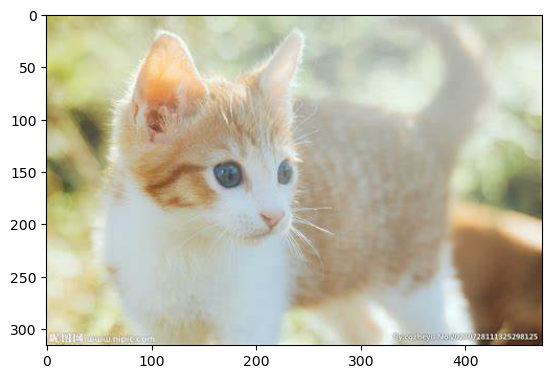

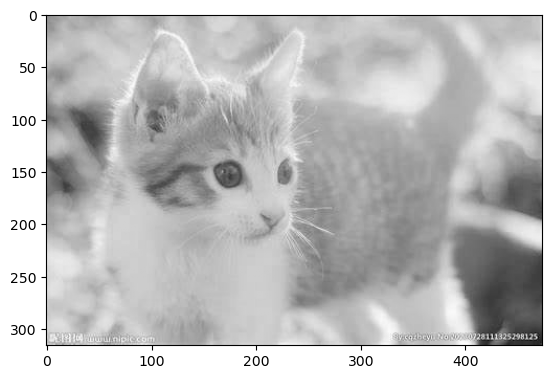

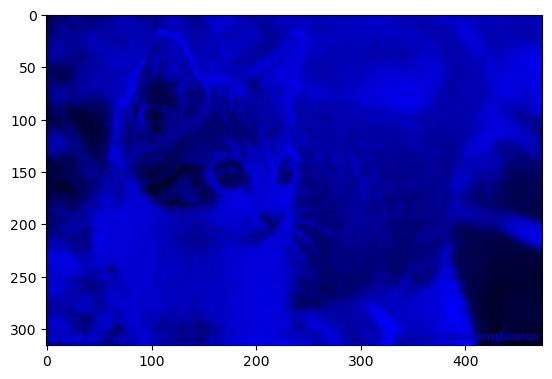

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# print(np.__version__)
# print(cv2.__version__)

#Include the image through cv2
img_cv = cv2.imread("Pictures/T1.jpeg")
img_orig=cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
print(img_orig.shape)
plt.imshow(img_orig)
plt.show()

#Convert image to array
img_orig=np.array(img_orig, dtype=np.uint32)
height,width,channels=img_orig.shape
img_gray=np.zeros((height,width), dtype=np.uint8)

#Convert to grayscale using the average method
for i in range(height):
    for j in range(width):
        pixel=img_orig[i,j]
        g_pixel=(pixel[0]+pixel[1]+pixel[2])/3
        img_gray[i,j]=g_pixel
plt.imshow(img_gray, cmap='gray')
plt.show()

img_test=np.array(img_orig, dtype=np.uint8)
img_test[:,:,0]=0
img_test[:,:,1]=0
plt.imshow(img_test)
plt.show()


### Histogram

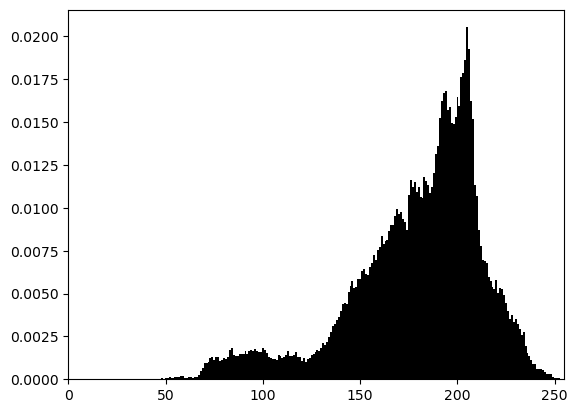

In [2]:
#Total number of pixels
def histogram(img):
    height, width = img.shape
    n=height*width
    pdf=np.zeros((256),dtype=np.float32)  
    for i in range(height) :
        for j in range(width) :
            pixel=img[i,j]
            pdf[pixel]+=1.0/n  
    plt.bar(range(256), pdf, width=1.0, color='black')
    plt.xlim([0, 255])
    plt.show()
histogram(img_gray)

### $\Gamma$ correction

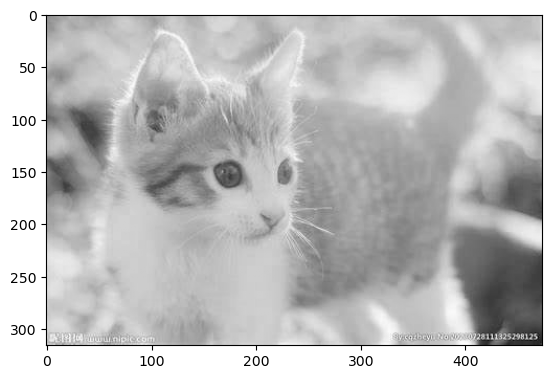

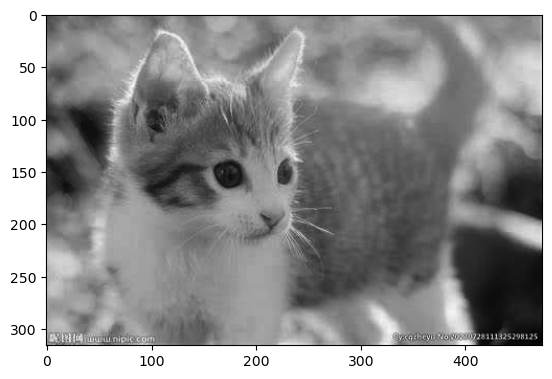

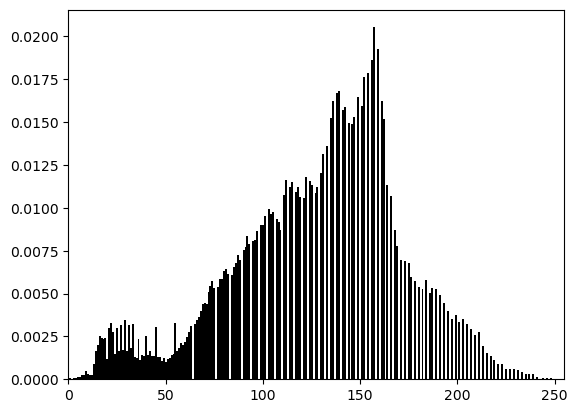

In [3]:
gamma=2.2
img_gamma=np.zeros((height,width),dtype=np.uint8)
for i in range(height):
    for j in range(width):
        pixel=img_gray[i,j]
        img_gamma[i,j]=pixel**gamma*255.0/(255**gamma)
plt.imshow(img_gray, cmap='gray')
plt.show()
plt.imshow(img_gamma, cmap='gray')
plt.show()
histogram(img_gamma)

### log transformation

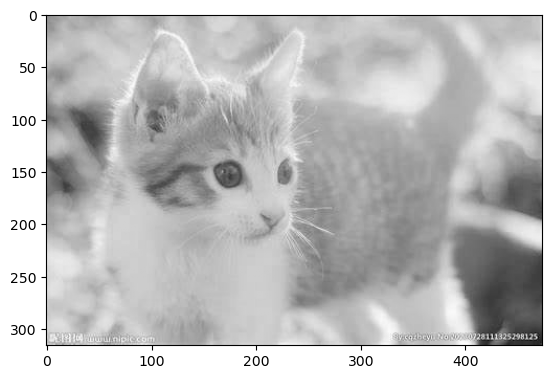

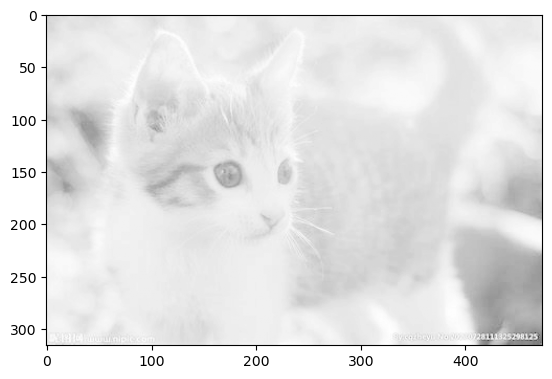

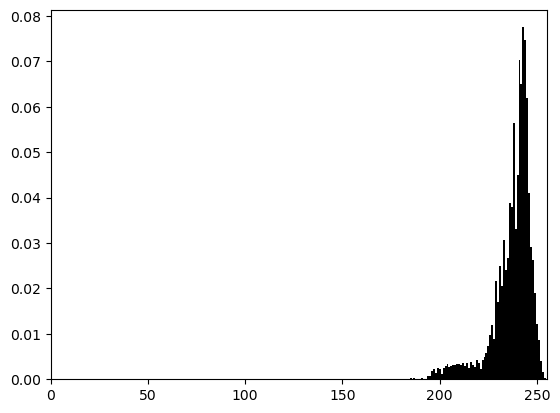

In [4]:
img_log=np.zeros((height,width),dtype=np.uint8)
for i in range(height):
    for j in range(width):
        pixel=img_gray[i,j]
        img_log[i,j]=np.log10(1+pixel)*255.0/np.log10(256)
plt.imshow(img_gray, cmap='gray')
plt.show()
plt.imshow(img_log, cmap='gray')
plt.show()
histogram(img_log)

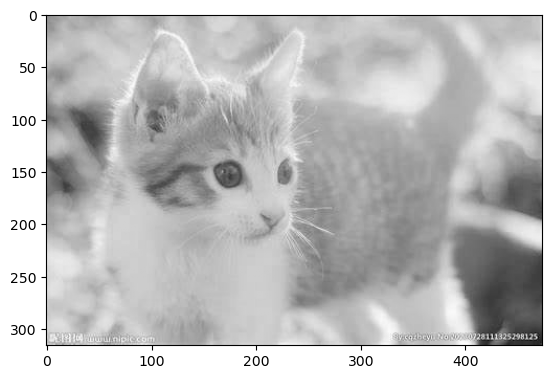

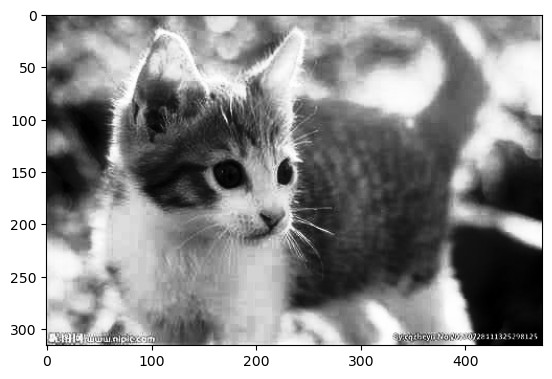

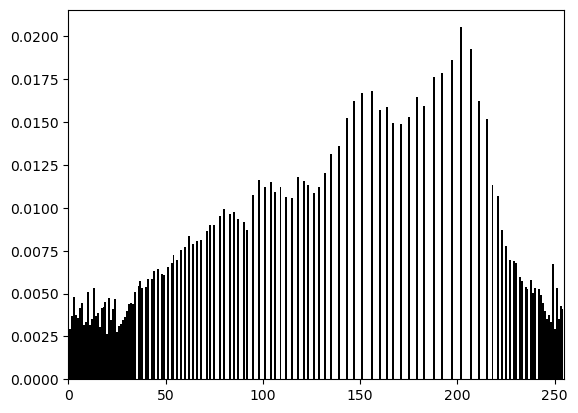

In [5]:
cdf=np.zeros((256),dtype=np.float32)
pdf=np.zeros((256),dtype=np.float32) 
img_equa=np.zeros((height,width), dtype=np.uint8) 
n=height*width
for i in range(height) :
    for j in range(width) :
        pixel=img_gray[i,j]
        pdf[pixel]+=1.0/n
cdf[0]=pdf[0]
for k in range(1,256):
    cdf[k]=cdf[k-1]+pdf[k]
for i in range(height):
    for j in range(width):
        pixel=img_gray[i,j]
        img_equa[i,j]=np.floor(((cdf[pixel]-cdf[0])/(1-cdf[0]))*255.0)
plt.imshow(img_gray, cmap='gray')
plt.show()
plt.imshow(img_equa, cmap='gray')
plt.show()
histogram(img_equa)

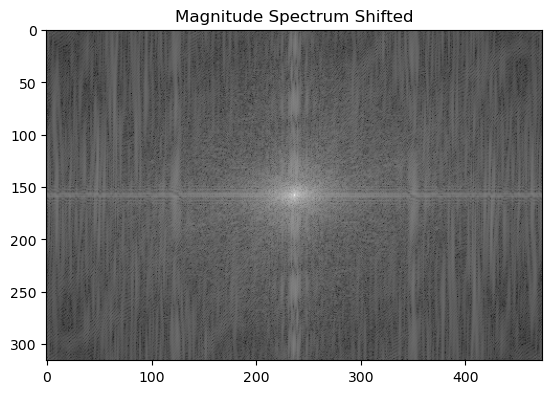

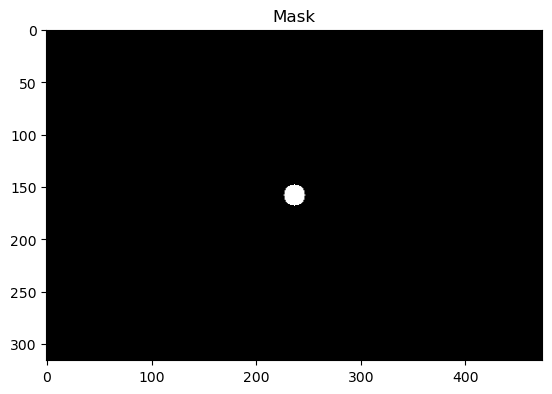

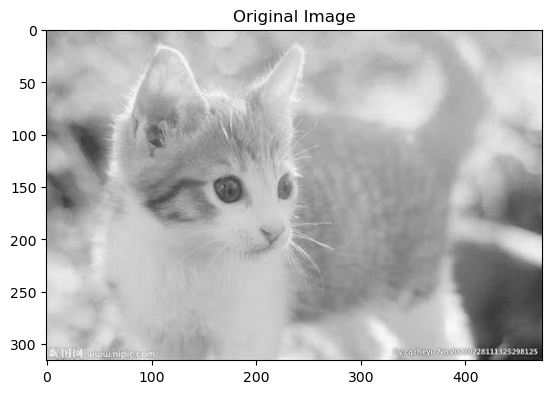

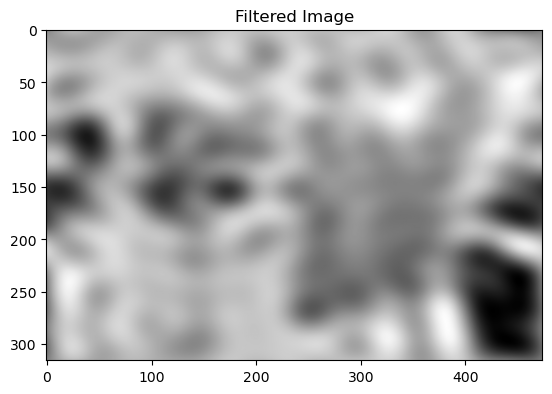

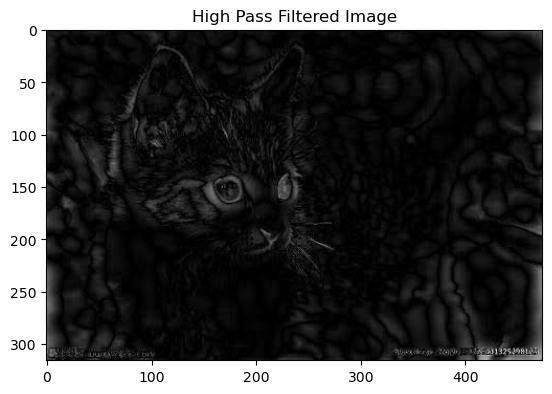

In [ ]:
dft = np.fft.fft2(img_gray)
magnitude_spectrum = np.abs(dft)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum_shifted = np.abs(dft_shift)
plt.imshow(np.log(magnitude_spectrum_shifted + 1), cmap='gray')
plt.title('Magnitude Spectrum Shifted')
plt.show()

crow, ccol = height//2, width//2
radius = 10 
mask = np.zeros((height, width), dtype=np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, -1)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.show()

dft_shift_filtered = dft_shift * mask
img_filtered = np.fft.ifft2(np.fft.ifftshift(dft_shift_filtered))
img_filtered = np.abs(img_filtered)
# img_filtered = np.uint8(np.clip(img_filtered, 0, 255))
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.show()
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image')
plt.show()

#High pass filter
mask_hp = 1 - mask
dft_shift_hp = dft_shift * mask_hp
img_hp = np.fft.ifft2(np.fft.ifftshift(dft_shift_hp))
img_hp = np.abs(img_hp)
plt.imshow(img_hp, cmap='gray')
plt.title('High Pass Filtered Image')
plt.show()

### Mean Filter vs Median Filter
- Mean filter use the mean value of matrix (with all 1 convolution kernel), same with the process of low-pass filter after DFT.
- Median filter use the median value instead.

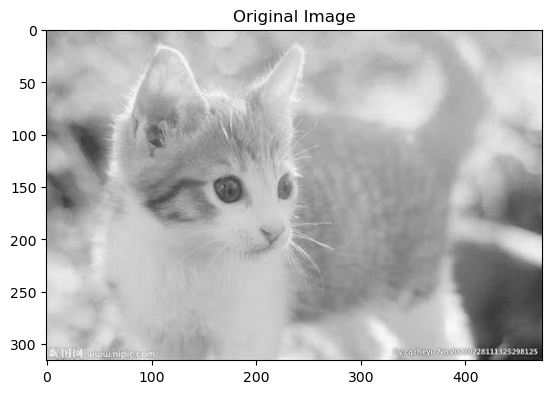

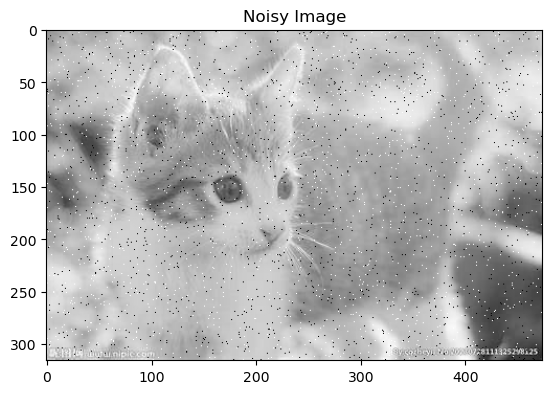

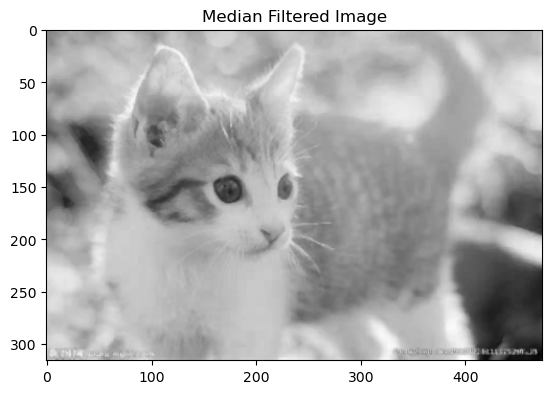

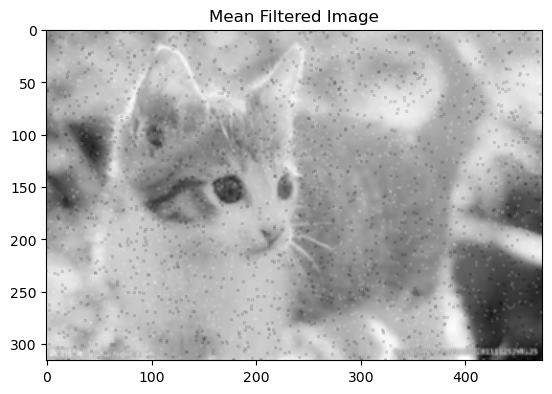

In [18]:
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.show()

noise = img_gray.copy()
prob = 0.02  # 噪声比例
rnd = np.random.rand(*noise.shape)
noise[rnd < (prob / 2)] = 0
noise[rnd > 1 - (prob / 2)] = 255
plt.imshow(noise, cmap='gray')
plt.title('Noisy Image')
plt.show()

ksize=3
pad=ksize//2
img_median=np.zeros((height,width),dtype=np.uint8)
img_mean=np.zeros((height,width),dtype=np.uint8)
padded = np.pad(noise, pad, mode="edge")
list_p=np.zeros(ksize*ksize,dtype=np.uint8)
for i in range(height):
    for j in range(width):
            for m in range(ksize):
                for n in range(ksize):
                     list_p[m*ksize+n]=padded[i+m,j+n]
            list_p.sort()
            img_median[i,j]=np.median(list_p)
            img_mean[i,j]=np.mean(list_p)
plt.imshow(img_median, cmap='gray')
plt.title('Median Filtered Image')
plt.show()
plt.imshow(img_mean, cmap='gray')
plt.title('Mean Filtered Image')
plt.show()

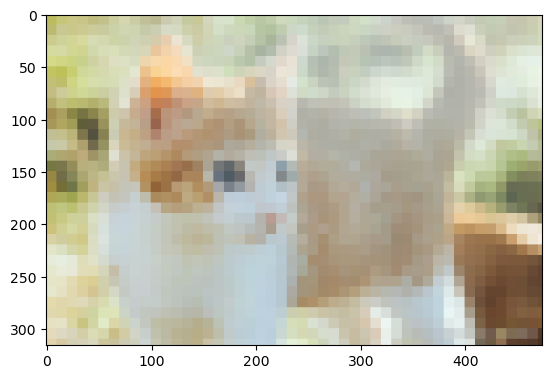

In [ ]:
block_size = 10
img_mosaic=img_orig.copy()  
for i in range(0, height, block_size):
    for j in range(0, width, block_size):
        i_end = min(i + block_size, height)
        j_end = min(j + block_size, width)
        
        block = img_mosaic[i:i_end, j:j_end]
        color = block.mean(axis=(0,1), dtype=int)
        
        img_mosaic[i:i_end, j:j_end] = color

plt.imshow(img_mosaic)
plt.show()  